## Подготовка данных, нормализация, трейн, тест

In [1]:
import torch
import sklearn
import numpy as np

In [2]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
#import os
#print(os.listdir("../input"))
# Any results you write to the current directory are saved as output.
from pandas import read_csv
#Lets load the dataset and sample some
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
#data = read_csv('/home/zamarseny/Data_Science/handson-ml/datasets/housing/housing.csv', header=None, delimiter=r"\s+", names=column_names)

#data = read_csv('/home/zamarseny/Data_Science/handson-ml/datasets/housing/housing.csv', \
#                #header=None, \
#                delimiter=','\
                #, names=column_names\
#               )

data = read_csv('./boston-house-prices/housing.csv', delimiter=r"\s+", names=column_names)
print(data.head(5))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [3]:
#data.describe()
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
labels=data.MEDV
features=data.drop(columns='MEDV')

In [6]:
features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [9]:
features.shape

(506, 13)

In [10]:
import seaborn as sns
sns.pairplot(data)


In [ ]:
#c предпоследней величиной, связанной с доходом (13. LSTAT: % lower status of the population) 
#видно зависимость похожую на обратную пропрорциональость

In [12]:
from sklearn import preprocessing

In [15]:
norm=preprocessing.StandardScaler().fit_transform(features)

In [16]:
norm.shape

(506, 13)

In [17]:
train_lenght=round(norm.shape[0]*0.8)
train_lenght

405

In [18]:
X_train=torch.tensor(norm[:train_lenght], dtype=torch.float)
y_train=torch.tensor(labels[:train_lenght], dtype=torch.float)
X_test=torch.tensor(norm[train_lenght+1:], dtype=torch.float)
y_test=torch.tensor(labels[train_lenght+1:].values, dtype=torch.float)

## Решение через Torch

In [19]:
#y[:train_lenght]
#y[train_lenght+1:].values
#labels[train_lenght+1:]
y_test

tensor([11.9000, 27.9000, 17.2000, 27.5000, 15.0000, 17.2000, 17.9000, 16.3000,
         7.0000,  7.2000,  7.5000, 10.4000,  8.8000,  8.4000, 16.7000, 14.2000,
        20.8000, 13.4000, 11.7000,  8.3000, 10.2000, 10.9000, 11.0000,  9.5000,
        14.5000, 14.1000, 16.1000, 14.3000, 11.7000, 13.4000,  9.6000,  8.7000,
         8.4000, 12.8000, 10.5000, 17.1000, 18.4000, 15.4000, 10.8000, 11.8000,
        14.9000, 12.6000, 14.1000, 13.0000, 13.4000, 15.2000, 16.1000, 17.8000,
        14.9000, 14.1000, 12.7000, 13.5000, 14.9000, 20.0000, 16.4000, 17.7000,
        19.5000, 20.2000, 21.4000, 19.9000, 19.0000, 19.1000, 19.1000, 20.1000,
        19.9000, 19.6000, 23.2000, 29.8000, 13.8000, 13.3000, 16.7000, 12.0000,
        14.6000, 21.4000, 23.0000, 23.7000, 25.0000, 21.8000, 20.6000, 21.2000,
        19.1000, 20.6000, 15.2000,  7.0000,  8.1000, 13.6000, 20.1000, 21.8000,
        24.5000, 23.1000, 19.7000, 18.3000, 21.2000, 17.5000, 16.8000, 22.4000,
        20.6000, 23.9000, 22.0000, 11.90

In [20]:
from torch.utils.data import TensorDataset, DataLoader

In [21]:
batch_size = 40
dataset = TensorDataset(X_train, y_train)
# Randomly reading mini-batches
data_iter = DataLoader(dataset, batch_size, shuffle=True)

# Read a batch to see how it works
for X, y in data_iter:
    print(X, y)
    break

tensor([[-0.4025,  0.5853, -0.8764, -0.2726, -0.8785, -0.1989, -1.4002,  1.9109,
         -0.1781, -0.7379,  0.5754,  0.3729, -0.8120],
        [ 0.6962, -0.4877,  1.0160, -0.2726,  1.1947,  0.1701,  1.1175, -1.0249,
          1.6612,  1.5309,  0.8066,  0.2131,  1.0733],
        [-0.3180, -0.4877,  1.5690, -0.2726,  0.5987, -0.9227,  0.9290, -0.8629,
         -0.6380,  0.1708,  1.2689,  0.4411,  0.7972],
        [ 0.3404, -0.4877,  1.0160,  3.6684,  0.6591,  1.0419,  1.0286, -1.2325,
          1.6612,  1.5309,  0.8066,  0.3879, -1.3587],
        [-0.4125, -0.4877,  2.1176, -0.2726,  0.2272, -0.5907,  0.0400, -0.7308,
         -0.8679, -1.3081,  0.2980,  0.3561,  0.2407],
        [-0.4057, -0.4877, -0.6167, -0.2726, -0.9217,  0.6915, -2.3354,  0.9155,
         -0.7529, -1.0408, -0.2569,  0.3151, -1.0952],
        [-0.2629, -0.4877, -0.4373, -0.2726, -0.1442, -0.3029,  1.1175,  0.1806,
         -0.6380, -0.6013,  1.1765,  0.2199,  0.0542],
        [-0.4152,  1.7656, -0.8487, -0.2726, -1.

In [53]:
model = torch.nn.Sequential(torch.nn.Linear(13, 1))

In [54]:
loss = torch.nn.MSELoss(reduction='mean')

In [55]:
trainer = torch.optim.SGD(model.parameters(), lr=0.001)

In [56]:
num_epochs = 16000
for epoch in range(0, num_epochs):
    for X, y in data_iter:
        trainer.zero_grad()
        l = loss(model.forward(X).reshape(-1), y)
        l.backward()
        trainer.step()
    l = loss(model.forward(X_train).reshape(-1), y_train)
    if epoch%1000==0:
        print('epoch %d, loss: %f' % (epoch, l.item()))
    #print('w', model[0].weight.data)
    #print('b', model[0].bias.data)

epoch 0, loss: 602.273682
epoch 1000, loss: 22.913795
epoch 2000, loss: 22.752312
epoch 3000, loss: 22.745642
epoch 4000, loss: 22.740953
epoch 5000, loss: 22.748760
epoch 6000, loss: 22.741524
epoch 7000, loss: 22.740494
epoch 8000, loss: 22.763018
epoch 9000, loss: 22.740828
epoch 10000, loss: 22.740429
epoch 11000, loss: 22.741423
epoch 12000, loss: 22.744722
epoch 13000, loss: 22.742481
epoch 14000, loss: 22.742142
epoch 15000, loss: 22.742987


In [57]:
w = model[0].weight.data

b = model[0].bias.data
print(X_test.shape, w.shape)
print((torch.mv(X_test, w[0])+b).shape, y_test.shape)

torch.Size([100, 13]) torch.Size([1, 13])
torch.Size([100]) torch.Size([100])


In [58]:
#(torch.mm(X_test, w.t())+b)[0]-y_test
y_pred_torch=torch.mv(X_test, w[0])+b
y_pred_train=torch.mv(X_train, w[0])+b
err_torch=y_pred_torch-y_test

In [59]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'y_pred')

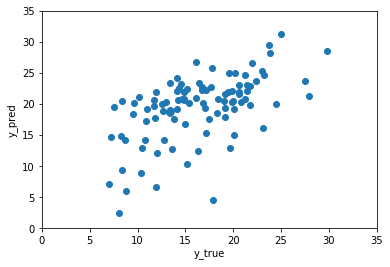

In [67]:
plt.scatter(np.array(y_test), np.array(torch.mv(X_test, w[0])+b))
plt.xlim(0, 35)
plt.ylim(0, 35)
plt.xlabel('y_true')
plt.ylabel('y_pred')

In [80]:
from sklearn.metrics import r2_score
print(r2_score(y_train, y_pred_train))
#print(r2_score(y_test, y_pred_torch))

0.7353541996518285


## Sklearn

In [63]:
from sklearn.linear_model import LinearRegression
#X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
#>>> # y = 1 * x_0 + 2 * x_1 + 3
#>>> y = np.dot(X, np.array([1, 2])) + 3
reg = LinearRegression().fit(np.array(X_train), np.array(y_train))
print(reg.score(X_train, y_train))
print(reg.coef_)
#array([1., 2.])
print(reg.intercept_)
y_pred=reg.predict(np.array(X_test))
print(reg.predict(np.array(X_test))-np.array(y_test))

0.7354553695297368
[-1.6726508   1.026751    0.35737726  0.47912702 -1.7303704   3.3419917
  0.07377152 -2.7366385   4.003384   -2.6220543  -1.7545723  -0.19896609
 -3.7918205 ]
23.128138
[ -5.1505775   -6.54335     -1.761281    -3.745264     1.9916363
   5.1705303  -13.126633    -3.782072   -11.076225     7.553505
  12.0624695   -1.2783413   -2.56495     12.147236     5.5128
   6.4788713   -0.45674515   5.7299385    8.141244     6.7349854
  11.056401     6.586874     8.354248     9.082161     8.753153
  10.047049    10.646799     8.391234     8.981301     5.2184715
  10.693552     5.6826077    1.1776094    1.3715153    2.4699974
   2.2114754    2.4328918    4.715004     3.5507822    6.050994
   5.8275223    7.3914413    5.1029835    7.3321743   10.131845
   7.177844     4.7874374    7.9025803    7.0782604    8.108799
   6.3469534    5.5062065    5.7263355    0.39237404   6.8971424
   4.946575     2.396202     4.69569      0.683588     0.42460823
   1.5502625    0.19381142  -1.2107296 

## Сравнение коэффициентов

In [79]:
w.numpy()-reg.coef_, b.numpy()-reg.intercept_

(array([[-0.00512445,  0.01248467,  0.02947715,  0.03005901, -0.03398669,
          0.04197073,  0.00782532,  0.04327345,  0.0385251 ,  0.021873  ,
         -0.00166976,  0.04236767, -0.01341677]], dtype=float32),
 array([0.01808167], dtype=float32))

In [ ]:
#ошибки в коэффициентах во втором знаке. Можно считать, что верно
#Так и должно быть, поскольку оптимальные коээфициенты - единственные.

In [78]:
np.sqrt(sum((y_pred-y_pred_torch.numpy())*(y_pred-y_pred_torch.numpy())))#.sum()

0.9600052941463108

In [76]:
np.linalg.norm(y_pred-y_pred_torch.numpy())

0.9600053

In [81]:
y_pred-y_pred_torch.numpy()

array([ 0.09818459, -0.00051117,  0.01007748, -0.00998878,  0.14237595,
        0.06991005,  0.22116661,  0.08329296,  0.24706459,  0.1217556 ,
        0.09600258,  0.14985466,  0.17316628,  0.09180641, -0.03188896,
       -0.00840378, -0.00376892,  0.11683464,  0.13236046,  0.15266323,
        0.11002541,  0.12923813,  0.08735657,  0.09334946,  0.04510307,
        0.01886749,  0.02209854,  0.059618  ,  0.07599258,  0.07016945,
        0.1134758 ,  0.15659428,  0.1605053 ,  0.00146866, -0.00190639,
       -0.05216408, -0.05297279, -0.05735779,  0.06192398,  0.1151638 ,
       -0.02193451, -0.0523243 , -0.05926704, -0.0272522 ,  0.08880043,
       -0.07289886, -0.06489754, -0.12908745,  0.08719063,  0.0782032 ,
        0.12805367,  0.1299305 , -0.01934814, -0.06640816, -0.03470993,
       -0.0814724 , -0.08189774, -0.10294533, -0.0930233 , -0.03549576,
        0.09797859, -0.05727005, -0.07162094, -0.07407188, -0.11545563,
       -0.1423626 , -0.12873459, -0.137434  , -0.03450966, -0.04

In [ ]:
#Предсказания двух решений Torch и Sklearn тоже близки 
#КОНЕЦ РЕШЕНИЯ